In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
 
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.decomposition import PCA

In [5]:
df_15_10inst = pd.read_csv('C:/PSL_KNN/data_15_frames_10_instances_with_fingers.csv')
df_15_10inst['classes'] = df_15_10inst['videoname'].apply(lambda x: x.split('_')[0])
x_10_10inst = df_15_10inst.groupby('videoname').agg({'coordinate':lambda x: list(x)})
print(pd.unique(df_15_10inst['videoname']))

temp_15_10inst = pd.DataFrame(x_10_10inst['coordinate'].tolist())

['aprender_175' 'aprender_18' 'aprender_195' 'aprender_217' 'aprender_27'
 'aprender_282' 'aprender_34' 'aprender_35' 'aprender_7' 'aprender__466'
 'bien_147' 'bien_174' 'bien_230' 'bien_241' 'bien_244' 'bien_269'
 'bien_278' 'bien_329' 'bien_337' 'bien_416' 'comer_146' 'comer_164'
 'comer_313' 'comer_477' 'comer_484' 'comer_489' 'comer_705' 'comer_743'
 'comer_779' 'comer_86' 'cuánto_405' 'cuánto_420' 'cuánto_445'
 'cuánto_448' 'cuánto_456' 'cuánto_483' 'cuánto_706' 'cuánto_708'
 'cuánto_742' 'cuánto_744' 'cómo_12' 'cómo_171' 'cómo_223' 'cómo_230'
 'cómo_387' 'cómo_427' 'cómo_44' 'cómo_85' 'cómo_9' 'cómo_90' 'decir_101'
 'decir_138' 'decir_224' 'decir_265' 'decir_276' 'decir_321' 'decir_433'
 'decir_528' 'decir_755' 'decir_789' 'dentro_369' 'dentro_457'
 'dentro_486' 'dentro_55' 'dentro_566' 'dentro_596' 'dentro_603'
 'dentro_627' 'dentro_692' 'dentro_73' 'emoción_143' 'emoción_145'
 'emoción_249' 'emoción_272' 'emoción_281' 'emoción_43' 'emoción_45'
 'emoción_54' 'emoción_71' 'emoció

In [6]:
temp_15_10inst.insert(0,"instance",['aprender_175', 'aprender_18', 'aprender_195', 'aprender_217', 'aprender_27',
 'aprender_282', 'aprender_34', 'aprender_35', 'aprender_7', 'aprender__466',
 'bien_147', 'bien_174', 'bien_230', 'bien_241', 'bien_244', 'bien_269',
 'bien_278', 'bien_329', 'bien_337', 'bien_416', 'comer_146', 'comer_164',
 'comer_313', 'comer_477', 'comer_484', 'comer_489', 'comer_705', 'comer_743',
 'comer_779', 'comer_86', 'cuánto_405', 'cuánto_420', 'cuánto_445',
 'cuánto_448', 'cuánto_456', 'cuánto_483', 'cuánto_706', 'cuánto_708',
 'cuánto_742', 'cuánto_744', 'cómo_12', 'cómo_171', 'cómo_223', 'cómo_230',
 'cómo_387', 'cómo_427', 'cómo_44', 'cómo_85', 'cómo_9', 'cómo_90', 'decir_101',
 'decir_138', 'decir_224', 'decir_265', 'decir_276', 'decir_321', 'decir_433',
 'decir_528', 'decir_755', 'decir_789', 'dentro_369', 'dentro_457',
 'dentro_486', 'dentro_55', 'dentro_566', 'dentro_596', 'dentro_603',
 'dentro_627', 'dentro_692', 'dentro_73', 'emoción_143', 'emoción_145',
 'emoción_249', 'emoción_272', 'emoción_281', 'emoción_43', 'emoción_45',
 'emoción_54', 'emoción_71', 'emoción_81', 'ese_100', 'ese_143', 'ese_214',
 'ese_385', 'ese_544', 'ese_608', 'ese_638', 'ese_642', 'ese_697', 'ese_719',
 'fuerte_152', 'fuerte_153', 'fuerte_240', 'fuerte_314', 'fuerte_361',
 'fuerte_362', 'fuerte_363', 'fuerte_571', 'fuerte_584', 'fuerte_588',
 'pensar_213', 'pensar_339', 'pensar_378', 'pensar_61', 'pensar_613',
 'pensar_623', 'pensar_66', 'pensar_761', 'pensar_771', 'pensar_97',
 'sentir_14', 'sentir_149', 'sentir_16', 'sentir_187', 'sentir_38',
 'sentir_458', 'sentir_570', 'sentir_591', 'sentir_604', 'sentir_89', 'sí_200',
 'sí_228', 'sí_240', 'sí_251', 'sí_277', 'sí_315', 'sí_37', 'sí_657', 'sí_659',
 'sí_76', 'tú_154', 'tú_176', 'tú_263', 'tú_277', 'tú_53', 'tú_635', 'tú_639',
 'tú_711', 'tú_778', 'tú_96', 'yo_113', 'yo_121', 'yo_123', 'yo_125', 'yo_152',
 'yo_164', 'yo_193', 'yo_235', 'yo_237', 'yo_3'],True)


temp_15_10inst['classes'] = temp_15_10inst['instance'].apply(lambda x: x.split('_')[0])


In [7]:
temp_15_10inst_w1 = temp_15_10inst[~temp_15_10inst.classes.str.startswith('bien')]
temp_15_10inst_w2 = temp_15_10inst_w1[~temp_15_10inst_w1.classes.str.startswith('cuánto')]
temp_15_10inst_w3 = temp_15_10inst_w2[~temp_15_10inst_w2.classes.str.startswith('cómo')]
temp_15_10inst_w4 = temp_15_10inst_w3[~temp_15_10inst_w3.classes.str.startswith('dentro')]
temp_15_10inst_w5 = temp_15_10inst_w4[~temp_15_10inst_w4.classes.str.startswith('emoción')]
temp_15_10inst_w6 = temp_15_10inst_w5[~temp_15_10inst_w5.classes.str.startswith('fuerte')]
temp_15_10inst_w7 = temp_15_10inst_w6[~temp_15_10inst_w6.classes.str.startswith('sí')]
temp_15_10inst_w8 = temp_15_10inst_w7[~temp_15_10inst_w7.classes.str.startswith('tú')]
temp_15_10inst_w9 = temp_15_10inst_w8[~temp_15_10inst_w8.classes.str.startswith('yo')]
temp_15_10inst_w10 = temp_15_10inst_w9[~temp_15_10inst_w9.classes.str.startswith('ese')]

In [8]:
temp_15_10inst_w10.instance.unique()

array(['aprender_175', 'aprender_18', 'aprender_195', 'aprender_217',
       'aprender_27', 'aprender_282', 'aprender_34', 'aprender_35',
       'aprender_7', 'aprender__466', 'comer_146', 'comer_164',
       'comer_313', 'comer_477', 'comer_484', 'comer_489', 'comer_705',
       'comer_743', 'comer_779', 'comer_86', 'decir_101', 'decir_138',
       'decir_224', 'decir_265', 'decir_276', 'decir_321', 'decir_433',
       'decir_528', 'decir_755', 'decir_789', 'pensar_213', 'pensar_339',
       'pensar_378', 'pensar_61', 'pensar_613', 'pensar_623', 'pensar_66',
       'pensar_761', 'pensar_771', 'pensar_97', 'sentir_14', 'sentir_149',
       'sentir_16', 'sentir_187', 'sentir_38', 'sentir_458', 'sentir_570',
       'sentir_591', 'sentir_604', 'sentir_89'], dtype=object)

In [9]:
temp_15_10inst_w10.classes.unique()

array(['aprender', 'comer', 'decir', 'pensar', 'sentir'], dtype=object)

In [10]:
# Number of instances
temp_15_10inst_w10['instance'].nunique()

50

In [11]:
# Number of classes
temp_15_10inst_w10['classes'].nunique()

5

In [12]:
dataset_15_10inst_verbs =temp_15_10inst_w3.iloc[:,1:1503]

X_15_10inst_verbs= dataset_15_10inst_verbs.iloc[:,:-1].values
y_15_10inst_verbs=  dataset_15_10inst_verbs.iloc[:,-1].values

In [13]:
Labelencoder_Y = LabelEncoder()
y_15_10inst_verbs= Labelencoder_Y.fit_transform(y_15_10inst_verbs)
y_15_10inst_verbs

X_train_15_10inst_verbs, X_test_15_10inst_verbs, y_train_15_10inst_verbs, y_test_15_10inst_verbs = train_test_split(X_15_10inst_verbs, y_15_10inst_verbs, test_size = 0.25, random_state=0)
scaler = MinMaxScaler()
X_train_15_10inst_verbs = scaler.fit_transform(X_train_15_10inst_verbs)
X_test_15_10inst_verbs = scaler.transform(X_test_15_10inst_verbs)

([<matplotlib.axis.XTick at 0x122ad61ec08>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

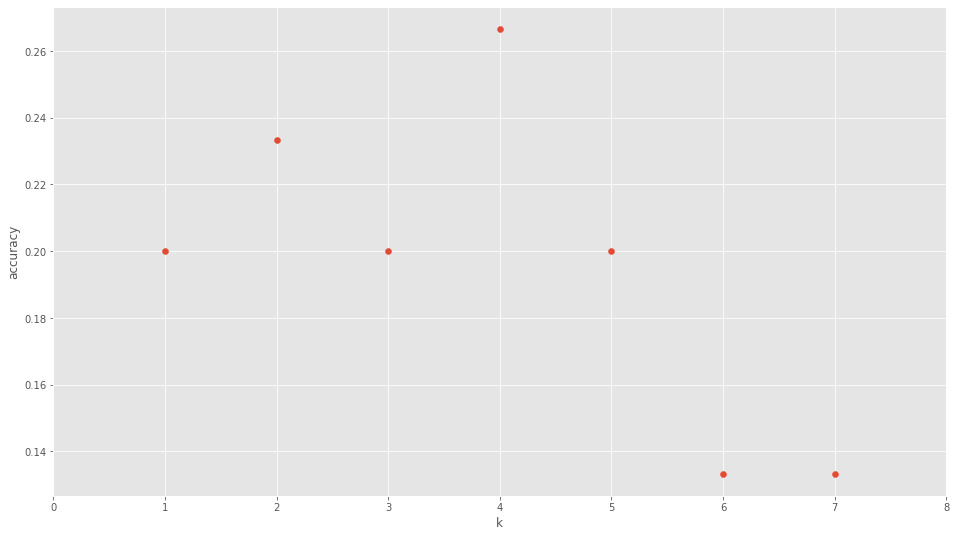

In [14]:
k_range_15_10inst_verbs = range(1, 8)
scores_15_10inst_verbs = []
for k in k_range_15_10inst_verbs:
    knn_15_10inst_verbs = KNeighborsClassifier(n_neighbors = k)
    knn_15_10inst_verbs.fit(X_train_15_10inst_verbs, y_train_15_10inst_verbs)
    scores_15_10inst_verbs.append(knn_15_10inst_verbs.score(X_test_15_10inst_verbs, y_test_15_10inst_verbs))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range_15_10inst_verbs, scores_15_10inst_verbs)
plt.xticks([0,1,2,3,4,5,6,7,8])

# With k = 1

Accuracy of K-NN classifier on training set: 1.00
Accuracy of K-NN classifier on test set: 0.20


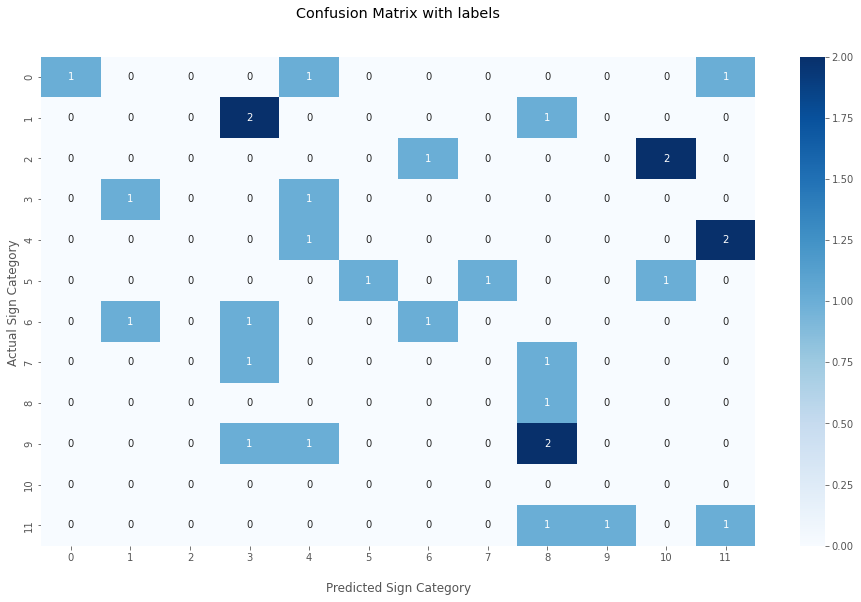

In [15]:
n_neighbors_15_10inst_verbs = 1
 
knn_15_10inst_verbs = KNeighborsClassifier(n_neighbors_15_10inst_verbs)
knn_15_10inst_verbs.fit(X_train_15_10inst_verbs, y_train_15_10inst_verbs)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn_15_10inst_verbs.score(X_train_15_10inst_verbs, y_train_15_10inst_verbs)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn_15_10inst_verbs.score(X_test_15_10inst_verbs, y_test_15_10inst_verbs)))
	 
import pandas as pd

pred_15_10inst_verbs = knn_15_10inst_verbs.predict(X_test_15_10inst_verbs)
cf_matrix_15_10inst_verbs = confusion_matrix(y_test_15_10inst_verbs, pred_15_10inst_verbs)

import seaborn as sns
import matplotlib.pyplot as plt

ax_15_10inst_verbs = sns.heatmap(cf_matrix_15_10inst_verbs, annot=True, cmap='Blues')

ax_15_10inst_verbs.set_title('Confusion Matrix with labels\n\n');
ax_15_10inst_verbs.set_xlabel('\nPredicted Sign Category')
ax_15_10inst_verbs.set_ylabel('Actual Sign Category ');

## Display the visualization of the Confusion Matrix.
plt.show()

# With k = 2

Accuracy of K-NN classifier on training set: 0.71
Accuracy of K-NN classifier on test set: 0.23


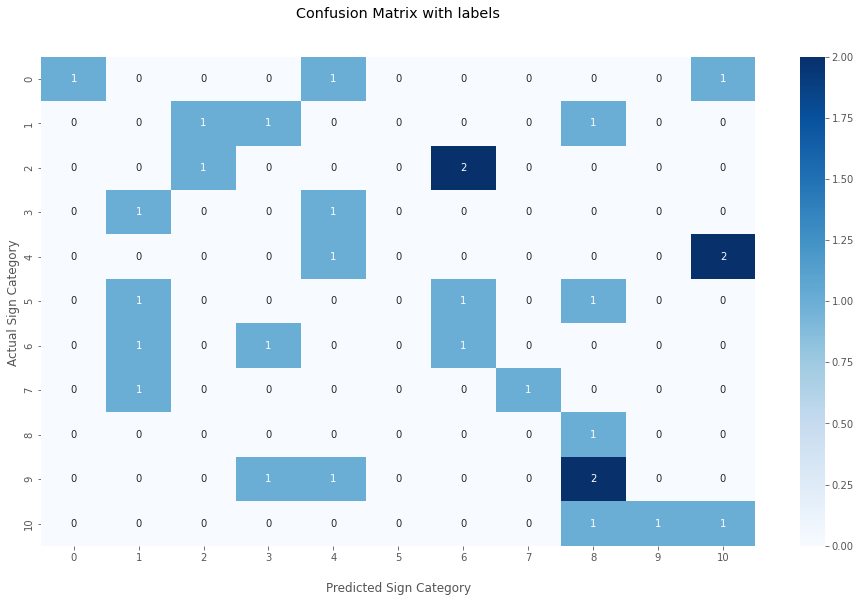

In [16]:
n_neighbors_15_10inst_verbs = 2
 
knn_15_10inst_verbs = KNeighborsClassifier(n_neighbors_15_10inst_verbs)
knn_15_10inst_verbs.fit(X_train_15_10inst_verbs, y_train_15_10inst_verbs)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn_15_10inst_verbs.score(X_train_15_10inst_verbs, y_train_15_10inst_verbs)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn_15_10inst_verbs.score(X_test_15_10inst_verbs, y_test_15_10inst_verbs)))
	 
import pandas as pd

pred_15_10inst_verbs = knn_15_10inst_verbs.predict(X_test_15_10inst_verbs)
cf_matrix_15_10inst_verbs = confusion_matrix(y_test_15_10inst_verbs, pred_15_10inst_verbs)

import seaborn as sns
import matplotlib.pyplot as plt

ax_15_10inst_verbs = sns.heatmap(cf_matrix_15_10inst_verbs, annot=True, cmap='Blues')

ax_15_10inst_verbs.set_title('Confusion Matrix with labels\n\n');
ax_15_10inst_verbs.set_xlabel('\nPredicted Sign Category')
ax_15_10inst_verbs.set_ylabel('Actual Sign Category ');

## Display the visualization of the Confusion Matrix.
plt.show()

# With k = 3

Accuracy of K-NN classifier on training set: 0.60
Accuracy of K-NN classifier on test set: 0.20


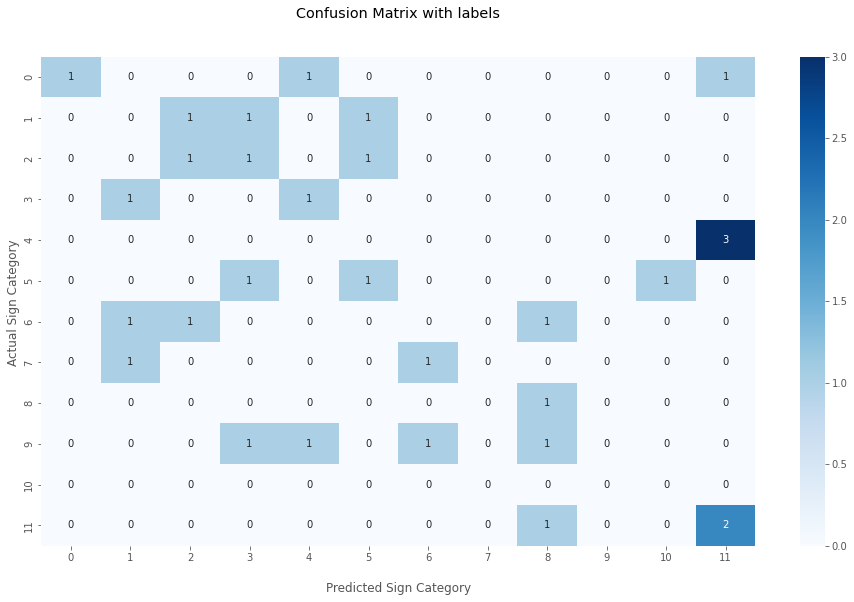

In [17]:
n_neighbors_15_10inst_verbs = 3
 
knn_15_10inst_verbs = KNeighborsClassifier(n_neighbors_15_10inst_verbs)
knn_15_10inst_verbs.fit(X_train_15_10inst_verbs, y_train_15_10inst_verbs)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn_15_10inst_verbs.score(X_train_15_10inst_verbs, y_train_15_10inst_verbs)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn_15_10inst_verbs.score(X_test_15_10inst_verbs, y_test_15_10inst_verbs)))
	 
import pandas as pd

pred_15_10inst_verbs = knn_15_10inst_verbs.predict(X_test_15_10inst_verbs)
cf_matrix_15_10inst_verbs = confusion_matrix(y_test_15_10inst_verbs, pred_15_10inst_verbs)

import seaborn as sns
import matplotlib.pyplot as plt

ax_15_10inst_verbs = sns.heatmap(cf_matrix_15_10inst_verbs, annot=True, cmap='Blues')

ax_15_10inst_verbs.set_title('Confusion Matrix with labels\n\n');
ax_15_10inst_verbs.set_xlabel('\nPredicted Sign Category')
ax_15_10inst_verbs.set_ylabel('Actual Sign Category ');

## Display the visualization of the Confusion Matrix.
plt.show()

# With k = 5

Accuracy of K-NN classifier on training set: 0.48
Accuracy of K-NN classifier on test set: 0.20


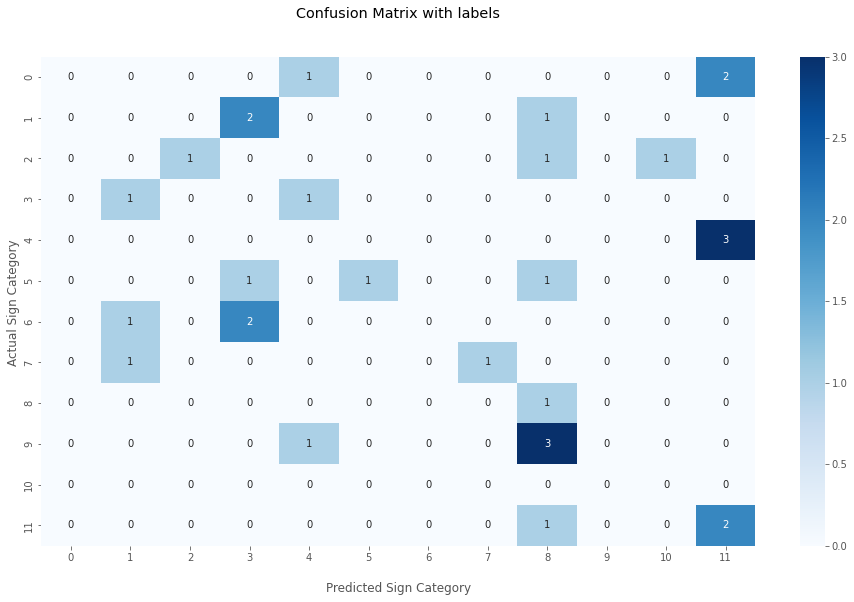

In [18]:
n_neighbors_15_10inst_verbs = 5
 
knn_15_10inst_verbs = KNeighborsClassifier(n_neighbors_15_10inst_verbs)
knn_15_10inst_verbs.fit(X_train_15_10inst_verbs, y_train_15_10inst_verbs)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn_15_10inst_verbs.score(X_train_15_10inst_verbs, y_train_15_10inst_verbs)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn_15_10inst_verbs.score(X_test_15_10inst_verbs, y_test_15_10inst_verbs)))
	 
import pandas as pd

pred_15_10inst_verbs = knn_15_10inst_verbs.predict(X_test_15_10inst_verbs)
cf_matrix_15_10inst_verbs = confusion_matrix(y_test_15_10inst_verbs, pred_15_10inst_verbs)

import seaborn as sns
import matplotlib.pyplot as plt

ax_15_10inst_verbs = sns.heatmap(cf_matrix_15_10inst_verbs, annot=True, cmap='Blues')

ax_15_10inst_verbs.set_title('Confusion Matrix with labels\n\n');
ax_15_10inst_verbs.set_xlabel('\nPredicted Sign Category')
ax_15_10inst_verbs.set_ylabel('Actual Sign Category ');

## Display the visualization of the Confusion Matrix.
plt.show()